In [1]:
!pip install kagglehub pandas matplotlib seaborn transformers tqdm

In [2]:
import kagglehub
import pandas as pd
import os
import glob

# ==========================================
# 1. 데이터셋 다운로드 (Kagglehub)
# ==========================================
print("📥 TweepFake 데이터셋 다운로드 중...")
# Kagglehub는 데이터를 캐시 폴더에 다운로드하고 그 경로(path)를 반환합니다.
path = kagglehub.dataset_download("mtesconi/twitter-deep-fake-text")

print(f"📂 데이터 다운로드 경로: {path}")

# ==========================================
# 2. CSV 파일 찾기 및 로드
# ==========================================
# 다운로드 경로 내의 모든 csv 파일을 찾습니다.
csv_files = glob.glob(os.path.join(path, "*.csv"))

if len(csv_files) == 0:
    print("❌ CSV 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
else:
    # 보통 파일 하나가 있거나, 메인 파일이 있습니다. 첫 번째 csv를 로드합니다.
    target_file = csv_files[0]
    print(f"📄 발견된 파일 로드: {os.path.basename(target_file)}")
    
    # CSV 읽기 (구분자가 ; 인 경우도 있으나 TweepFake는 보통 , 또는 ; 사용. 일단 기본값으로 시도)
    try:
        df = pd.read_csv(target_file)
    except:
        # 만약 에러나면 구분자를 ;로 다시 시도
        df = pd.read_csv(target_file, sep=';')

    print(f"✅ 데이터 로드 완료! 총 {len(df)}행")

📥 TweepFake 데이터셋 다운로드 중...


100%|██████████| 345k/345k [00:00<00:00, 1.51MB/s]

Extracting model files...
📂 데이터 다운로드 경로: C:\Users\SeungWoo\.cache\kagglehub\datasets\mtesconi\twitter-deep-fake-text\versions\8
📄 발견된 파일 로드: test.csv
✅ 데이터 로드 완료! 총 2558행


In [3]:
# ==========================================
# 3. 데이터 구조 브리핑
# ==========================================
print("\n📊 [데이터셋 정보]")
print(f"- 컬럼 목록: {df.columns.tolist()}")
print(f"- 결측치 확인:\n{df.isnull().sum()}")

# 라벨(Label) 정보 확인
# TweepFake는 보통 'account.type'(human/bot)과 'class_type'(gpt2, rnn...) 컬럼이 중요합니다.
if 'account.type' in df.columns:
    print("\n🤖 계정 타입 분포:")
    print(df['account.type'].value_counts())

if 'class_type' in df.columns:
    print("\n📝 생성 모델/소스 분포:")
    print(df['class_type'].value_counts())

# ==========================================
# 4. 상위 20개 데이터 확인
# ==========================================
print("\n🔍 [상위 20개 샘플 데이터]")
# 보기 좋게 주요 컬럼만 선택해서 출력 (컬럼명이 다를 경우 수정 필요)
display_cols = ['screen_name', 'text', 'account.type', 'class_type'] 
# 실제 컬럼에 존재하는 것만 필터링
valid_cols = [c for c in display_cols if c in df.columns]

display(df[valid_cols].head(20))


📊 [데이터셋 정보]
- 컬럼 목록: ['user_id', 'status_id', 'screen_name', 'account.type', 'class_type']
- 결측치 확인:
user_id         0
status_id       0
screen_name     0
account.type    0
class_type      0
dtype: int64

🤖 계정 타입 분포:
bot      1280
human    1278
Name: account.type, dtype: int64

📝 생성 모델/소스 분포:
human     1278
others     484
rnn        412
gpt2       384
Name: class_type, dtype: int64

🔍 [상위 20개 샘플 데이터]


,screen_name,account.type,class_type
0,human#17,human,human
1,human#11,human,human
2,human#1,human,human
3,bot#12,bot,rnn
4,human#10,human,human
5,bot#9,bot,others
6,bot#16,bot,rnn
7,human#8,human,human
8,human#4,human,human
9,human#11,human,human


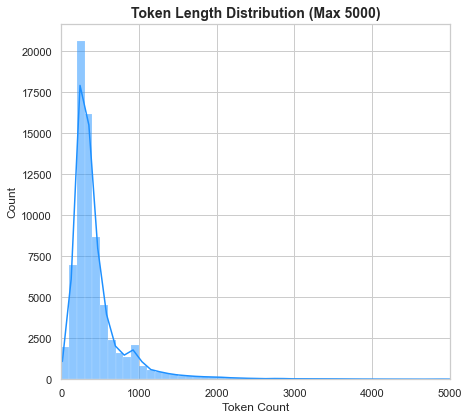

In [11]:
# ==========================================
# TweepFake 시각화 (범위 제한: 0 ~ 5000)
# ==========================================
sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 6))

# 1. 히스토그램 (x축 제한)
plt.subplot(1, 3, 1)
sns.histplot(df['token_length'], bins=50, kde=True, color='dodgerblue', binrange=(0, 5000))
plt.xlim(0, 5000)  # 👈 X축 고정
plt.title('Token Length Distribution (Max 5000)', fontsize=14, fontweight='bold')
plt.xlabel('Token Count')

# 2. Human vs Bot (y축 제한)
if 'account.type' in df.columns:
    plt.subplot(1, 3, 2)
    sns.boxplot(x='account.type', y='token_length', data=df, palette="Set2")
    plt.ylim(0, 5000)  # 👈 Y축 고정
    plt.title('Human vs Bot (Zoomed In)', fontsize=14, fontweight='bold')

# 3. 모델별 비교 (y축 제한)
if 'class_type' in df.columns:
    plt.subplot(1, 3, 3)
    sns.boxplot(x='class_type', y='token_length', data=df, palette="coolwarm")
    plt.ylim(0, 5000)  # 👈 Y축 고정
    plt.title('By Model (Zoomed In)', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [5]:
# 셸 명령어 실행 (설치가 안 되어 있다면 맨 처음에 실행)
!pip install datasets pandas matplotlib seaborn transformers tqdm

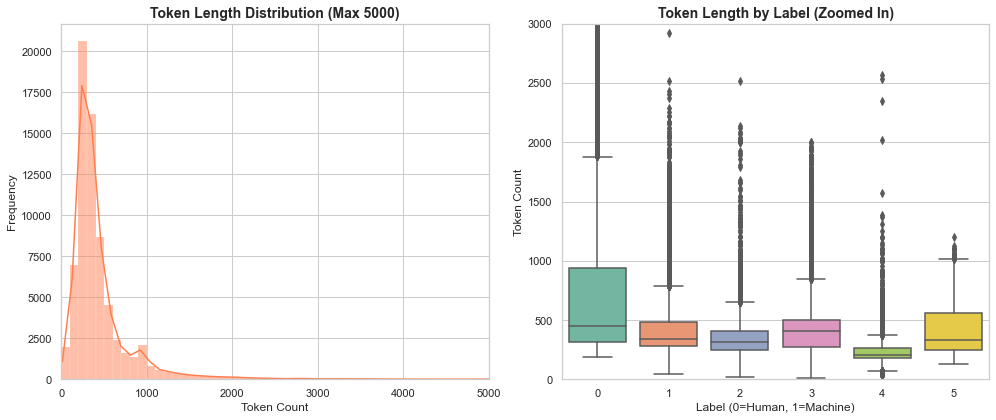

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# SemEval 시각화 (범위 제한: 0 ~ 5000)
# ==========================================
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6))

# 1. 히스토그램 (x축 제한)
plt.subplot(1, 2, 1)
# binrange를 써서 애초에 0~5000 사이만 계산하도록 설정하면 더 깔끔합니다
sns.histplot(df['token_length'], bins=50, kde=True, color='coral', binrange=(0, 5000))
plt.xlim(0, 5000)  # 👈 요청하신 부분: X축 최대치 5000 고정
plt.title('Token Length Distribution (Max 5000)', fontsize=14, fontweight='bold')
plt.xlabel('Token Count')
plt.ylabel('Frequency')

# 2. 박스플롯 (y축 제한)
if 'label' in df.columns:
    plt.subplot(1, 2, 2)
    sns.boxplot(x='label', y='token_length', data=df, palette="Set2")
    plt.ylim(0, 3000)  # 👈 박스플롯은 길이가 y축이므로 y축을 제한
    plt.title('Token Length by Label (Zoomed In)', fontsize=14, fontweight='bold')
    plt.xlabel('Label (0=Human, 1=Machine)')
    plt.ylabel('Token Count')

plt.tight_layout()
plt.show()